In [1]:
#Some basic imports
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("/home/manju838/coding/env/pytorch_env/NN_Classwork/Training CW/Advertising.csv") #Reading csv file given
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
len(data[:]) #length of dataset

200

In [4]:
data.shape

(200, 5)

In [5]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
data.columns #I have an additional unnamed column

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
data.iloc[0]

Unnamed: 0      1.0
TV            230.1
radio          37.8
newspaper      69.2
sales          22.1
Name: 0, dtype: float64

In [8]:
data.iloc[0,1]

230.1

In [9]:
data.head().iloc[:3,1:-1]

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3


In [10]:
def scale(x,min_scale,max_scale): #This is fn.written to scale the data
    return(min_scale + ((x - x.min()) / (x.max() - x.min()) )*(max_scale - min_scale))

In [11]:
scaled_data = {"TV":scale(data.iloc[:,1],-1,1), "Radio":scale(data.iloc[:,2],-1,1), "Newspaper":scale(data.iloc[:,3],-1,1), "Sales":scale(data.iloc[:,4],0,1) }
scaled_frame = pd.DataFrame(data = scaled_data) #Scaled_frame is dataframe created with scaled data,I used fn. defined earlier to scale data
scaled_frame

,TV,Radio,Newspaper,Sales
0,0.551573,0.524194,0.211961,0.807087
1,-0.703754,0.584677,-0.211961,0.346457
2,-0.888400,0.850806,0.213720,0.303150
3,0.019953,0.665323,0.023747,0.665354
4,0.218126,-0.564516,0.021988,0.444882
...,...,...,...,...
195,-0.746365,-0.850806,-0.762533,0.236220
196,-0.367602,-0.802419,-0.862797,0.318898
197,0.192425,-0.625000,-0.892700,0.440945
198,0.913426,0.693548,0.159191,0.940945


In [12]:
randomised_scale = scaled_frame.sample(frac=1, random_state = 1)
randomised_scale ##randomised_scale is dataframe created after randomising data,I used .saample() fn. to sample data

,TV,Radio,Newspaper,Sales
58,0.421035,1.000000,-0.342128,0.874016
40,0.364897,-0.100806,-0.449428,0.590551
34,-0.357457,-0.943548,-0.875110,0.311024
102,0.890429,-0.592742,-0.628848,0.519685
184,0.711870,-0.141129,-0.477573,0.629921
...,...,...,...,...
133,0.481907,0.350806,-0.211961,0.708661
137,0.846466,0.165323,0.044855,0.755906
72,-0.823470,0.330645,-0.665787,0.283465
140,-0.508285,-0.314516,-0.778364,0.366142


In [13]:
randomised_scale.columns #Now this column has only required columns,first three are inputs last column is output

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [14]:
X = randomised_scale.iloc[:,:-1]
y = randomised_scale.iloc[:,-1] 

In [15]:
X = []
for i in range(len(randomised_scale.iloc[:,:-1])):
    X.append([randomised_scale.iloc[i,0], randomised_scale.iloc[i,1], randomised_scale.iloc[i,2]])
y = []
for i in range(len(randomised_scale.iloc[:,-1])):
    y.append([randomised_scale.iloc[i,3]])
X = np.array(X, dtype = float)
y = np.array(y, dtype = float) #To do dot product I need to convert these into arrays,so I did that

In [16]:
X

array([[ 0.42103483,  1.        , -0.34212841],
       [ 0.36489685, -0.10080645, -0.44942832],
       [-0.35745688, -0.94354839, -0.87510994],
       [ 0.89042949, -0.59274194, -0.62884785],
       [ 0.71187014, -0.14112903, -0.47757256],
       [ 0.91342577,  0.69354839,  0.15919085],
       [ 0.09976327,  0.27419355, -0.07475814],
       [ 0.21812648, -0.56451613,  0.02198769],
       [-0.52722354, -0.35483871, -0.28759894],
       [ 0.45214745, -0.0483871 ,  0.00791557],
       [ 0.10787961, -0.15725806, -0.17150396],
       [-0.53669259, -0.1733871 , -0.68337731],
       [ 0.44741292, -0.03225806, -0.93491645],
       [-0.26208996,  0.92741935, -0.10114336],
       [ 0.52248901, -0.66935484, -0.0114336 ],
       [-0.15454853,  0.48790323,  0.3878628 ],
       [-0.11396686, -0.25806452, -0.39665787],
       [ 0.96144741, -0.83467742, -0.85576077],
       [-0.83158607,  0.57258065, -0.84168865],
       [ 0.42035847,  0.18951613, -0.84168865],
       [-0.32566791, -0.61290323, -0.941

In [17]:
y

array([[0.87401575],
       [0.59055118],
       [0.31102362],
       [0.51968504],
       [0.62992126],
       [0.94094488],
       [0.6023622 ],
       [0.44488189],
       [0.3503937 ],
       [0.61023622],
       [0.50787402],
       [0.38188976],
       [0.62204724],
       [0.59448819],
       [0.46456693],
       [0.56299213],
       [0.44488189],
       [0.44094488],
       [0.31102362],
       [0.66141732],
       [0.35826772],
       [0.42913386],
       [0.27165354],
       [0.38976378],
       [0.40551181],
       [0.52362205],
       [0.33464567],
       [0.68110236],
       [0.70866142],
       [0.56299213],
       [0.8503937 ],
       [0.40551181],
       [0.61811024],
       [0.3976378 ],
       [0.73228346],
       [0.54724409],
       [0.38976378],
       [0.37007874],
       [0.81496063],
       [0.23622047],
       [0.14566929],
       [0.27952756],
       [0.2007874 ],
       [0.68503937],
       [0.15354331],
       [0.51181102],
       [0.51181102],
       [0.783

In [58]:
# This NN has three input neurons,3 hidden neurons and 1 output neuron 
class NeuralNetwork(object):
    def __init__(self):
        #parameters
        self.inputSize = 3
        self.outputSize = 1
        self.hiddenSize = 3
        self.arr = np.array([])
        
        #weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x3) weight matrix from input to hidden layer
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer
        
    def feedForward(self, X):
        #forward propogation through the network
        self.z = np.dot(X, self.W1) #dot product of X (input) and first set of weights (3x2)
        self.z2 = self.sigmoid(self.z) #activation function
        self.z3 = np.dot(self.z2, self.W2) #dot product of hidden layer (z2) and second set of weights (3x1)
        output = self.sigmoid(self.z3)
        return output
        
    def sigmoid(self, s, deriv=False):
        if (deriv == True):
            return s * (1 - s)
        return 1/(1 + np.exp(-s))
    
    def backward(self, X, y, output):
        #backward propogate through the network
        self.output_error = (y - output) # gradient error in output, i.e dE/dy
        self.output_delta = self.output_error * self.sigmoid(output, deriv=True) #This is dE/dy * dy/dW
        
        self.z2_error = self.output_delta.dot(self.W2.T) #z2 error: how much our hidden layer weights contribute to output error
        self.z2_delta = self.z2_error * self.sigmoid(self.z2, deriv=True) #applying derivative of sigmoid to z2 error
        
        self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input -> hidden) weights
        self.W2 += self.z2.T.dot(self.output_delta) # adjusting second set (hidden -> output) weights
        
    def train(self, X, y):
        output = self.feedForward(X)
        self.backward(X, y, output)
        print((0.5*(np.square(y - output))).shape)
        self.arr = np.append(self.arr,(0.5*(np.square(y - output)))[0])
        print("Loss: " + str(0.5*(np.square(y - output))))

In [59]:
NN = NeuralNetwork()

for i in range(100): #trains the NN 100 times/epochs
    NN.train(X, y)
#I printed loss for each datapoint in train method.So for 200 datapoints and 100 epochs each,total no.of loss values calculated is 20000 points,I printed shape after each epoch for more clarity

(200, 1)
Loss: [[9.83986942e-02]
 [8.70187656e-03]
 [1.21400570e-02]
 [1.04125468e-03]
 [1.38293735e-02]
 [1.19941305e-01]
 [1.16744692e-02]
 [4.96436562e-04]
 [5.66737199e-03]
 [1.05706104e-02]
 [1.10001786e-03]
 [2.04564870e-03]
 [1.45057984e-02]
 [1.37043749e-02]
 [1.41709053e-04]
 [6.69538025e-03]
 [8.32931123e-05]
 [6.15459684e-04]
 [6.17259846e-03]
 [2.31734607e-02]
 [4.95569958e-03]
 [2.44998043e-04]
 [1.45628250e-02]
 [2.13496864e-03]
 [1.39560712e-03]
 [1.97601343e-03]
 [5.61331839e-03]
 [2.55407103e-02]
 [3.94015108e-02]
 [4.73260823e-03]
 [8.54631286e-02]
 [3.79238778e-03]
 [1.70555792e-02]
 [2.81327282e-03]
 [3.95800802e-02]
 [4.13264286e-03]
 [3.57246052e-03]
 [5.07822285e-03]
 [7.24725690e-02]
 [2.11114645e-02]
 [5.13519686e-02]
 [1.84113765e-02]
 [3.16803937e-02]
 [2.76619956e-02]
 [4.04394295e-02]
 [1.97310275e-03]
 [3.84316207e-03]
 [5.79600738e-02]
 [7.84683052e-02]
 [3.18912772e-02]
 [1.19783399e-01]
 [5.19549333e-03]
 [3.14582203e-02]
 [5.61096037e-02]
 [1.32054941e

In [60]:
print(NN.arr)#This array is the error for each epoch for the first input value set.Just note that the error decreased from 10^-2 to 10^-3.For this particular value error decreased to 10^-5 in the 9th epoch but later increased again, i.e overshooting happened here.This can be attributed to the fact that my model is three layer perceptron,the hidden neurons are fixed(I fixed it as 3),and also this only datapoint can't be used to do hyperparameter tuning. 

[9.83986942e-02 8.28513638e-03 3.80242540e-01 3.78082387e-01
 3.42084502e-01 1.79433863e-01 3.93569218e-02 4.06394428e-02
 2.04095728e-05 8.76733651e-03 8.31114862e-04 8.95101360e-04
 2.11454056e-04 2.43885967e-03 7.08470096e-04 3.95779107e-03
 1.45886717e-03 3.01468487e-03 1.46080461e-03 2.58320811e-03
 1.39825114e-03 2.83374435e-03 1.52972491e-03 2.75607532e-03
 1.58230740e-03 2.59321924e-03 1.57759033e-03 2.56613074e-03
 1.60122336e-03 2.53326054e-03 1.62402111e-03 2.47784927e-03
 1.63298658e-03 2.44280126e-03 1.64201860e-03 2.41802257e-03
 1.65141266e-03 2.39402528e-03 1.65794672e-03 2.37503917e-03
 1.66290401e-03 2.36120131e-03 1.66705302e-03 2.35055011e-03
 1.67011771e-03 2.34279624e-03 1.67219911e-03 2.33777201e-03
 1.67351844e-03 2.33497451e-03 1.67416393e-03 2.33402212e-03
 1.67421801e-03 2.33462815e-03 1.67378127e-03 2.33650654e-03
 1.67294092e-03 2.33939490e-03 1.67177363e-03 2.34306376e-03
 1.67035098e-03 2.34730727e-03 1.66873784e-03 2.35194106e-03
 1.66699186e-03 2.356802

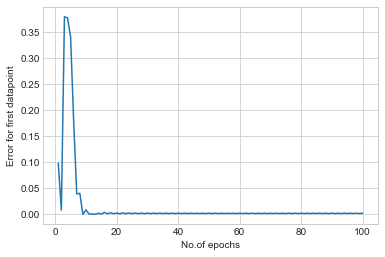

In [62]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure() #figurecan be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. 
ax = plt.axes() #The axes is a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization. 

x = np.arange(1, 101)
plt.xlabel("No.of epochs")
plt.ylabel("Error for first datapoint")
ax.plot(x, NN.arr)

In [53]:
print("Input: " + str(X))

Input: [[ 0.42103483  1.         -0.34212841]
 [ 0.36489685 -0.10080645 -0.44942832]
 [-0.35745688 -0.94354839 -0.87510994]
 [ 0.89042949 -0.59274194 -0.62884785]
 [ 0.71187014 -0.14112903 -0.47757256]
 [ 0.91342577  0.69354839  0.15919085]
 [ 0.09976327  0.27419355 -0.07475814]
 [ 0.21812648 -0.56451613  0.02198769]
 [-0.52722354 -0.35483871 -0.28759894]
 [ 0.45214745 -0.0483871   0.00791557]
 [ 0.10787961 -0.15725806 -0.17150396]
 [-0.53669259 -0.1733871  -0.68337731]
 [ 0.44741292 -0.03225806 -0.93491645]
 [-0.26208996  0.92741935 -0.10114336]
 [ 0.52248901 -0.66935484 -0.0114336 ]
 [-0.15454853  0.48790323  0.3878628 ]
 [-0.11396686 -0.25806452 -0.39665787]
 [ 0.96144741 -0.83467742 -0.85576077]
 [-0.83158607  0.57258065 -0.84168865]
 [ 0.42035847  0.18951613 -0.84168865]
 [-0.32566791 -0.61290323 -0.94195251]
 [-0.54616165  0.47580645  1.        ]
 [-0.83496787  0.03629032 -0.24362357]
 [-0.27832262 -0.43548387 -0.81354442]
 [-0.24112276 -0.2983871  -0.32629727]
 [ 0.26952993 -0.2

In [54]:
print("Actual Output: " + str(y))

Actual Output: [[0.87401575]
 [0.59055118]
 [0.31102362]
 [0.51968504]
 [0.62992126]
 [0.94094488]
 [0.6023622 ]
 [0.44488189]
 [0.3503937 ]
 [0.61023622]
 [0.50787402]
 [0.38188976]
 [0.62204724]
 [0.59448819]
 [0.46456693]
 [0.56299213]
 [0.44488189]
 [0.44094488]
 [0.31102362]
 [0.66141732]
 [0.35826772]
 [0.42913386]
 [0.27165354]
 [0.38976378]
 [0.40551181]
 [0.52362205]
 [0.33464567]
 [0.68110236]
 [0.70866142]
 [0.56299213]
 [0.8503937 ]
 [0.40551181]
 [0.61811024]
 [0.3976378 ]
 [0.73228346]
 [0.54724409]
 [0.38976378]
 [0.37007874]
 [0.81496063]
 [0.23622047]
 [0.14566929]
 [0.27952756]
 [0.2007874 ]
 [0.68503937]
 [0.15354331]
 [0.51181102]
 [0.51181102]
 [0.78346457]
 [0.82677165]
 [0.71259843]
 [0.93700787]
 [0.53543307]
 [0.19685039]
 [0.77165354]
 [0.62204724]
 [0.43307087]
 [0.41732283]
 [0.22047244]
 [0.46456693]
 [0.31496063]
 [0.41732283]
 [0.46456693]
 [0.14566929]
 [0.7519685 ]
 [0.8976378 ]
 [0.22047244]
 [0.28346457]
 [0.69291339]
 [0.51968504]
 [0.31102362]
 [0.7

In [55]:
print("Predicted Output: " + str(NN.feedForward(X)))

Predicted Output: [[0.93580848]
 [0.68862847]
 [0.41318565]
 [0.64372493]
 [0.78417679]
 [0.94385206]
 [0.79996709]
 [0.52661465]
 [0.27483338]
 [0.84301574]
 [0.61490873]
 [0.38334795]
 [0.59011984]
 [0.833805  ]
 [0.65595587]
 [0.7796605 ]
 [0.45654527]
 [0.55462487]
 [0.409035  ]
 [0.66140258]
 [0.44735772]
 [0.75436395]
 [0.25126611]
 [0.44515411]
 [0.38744724]
 [0.57760746]
 [0.3014887 ]
 [0.79929368]
 [0.67933863]
 [0.65293387]
 [0.88950274]
 [0.71885134]
 [0.59650425]
 [0.44936993]
 [0.81663334]
 [0.58815473]
 [0.50533705]
 [0.3695945 ]
 [0.90667595]
 [0.30031517]
 [0.21212191]
 [0.32340779]
 [0.25166384]
 [0.87731526]
 [0.24126168]
 [0.5373422 ]
 [0.67160213]
 [0.89814786]
 [0.87791811]
 [0.9008805 ]
 [0.94881867]
 [0.56444126]
 [0.26657599]
 [0.91828857]
 [0.61048399]
 [0.48321111]
 [0.51736997]
 [0.2329717 ]
 [0.53059924]
 [0.34605392]
 [0.45637756]
 [0.48091532]
 [0.33776764]
 [0.75161886]
 [0.94506936]
 [0.67216548]
 [0.38145198]
 [0.87427826]
 [0.75318385]
 [0.39852584]
 [